In [1]:
!pip install tensorflow    opencv-python matplotlib

You should consider upgrading via the 'C:\datascince\fooddata\foodenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [32]:

data_dir = pathlib.Path('C:/datascince/ImageClassification/fooddata')


In [33]:
data_dir

WindowsPath('C:/datascince/ImageClassification/fooddata')

In [ ]:
 tf.keras.utils.image_dataset_from_directory??

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


2000


In [ ]:
list(data_dir)

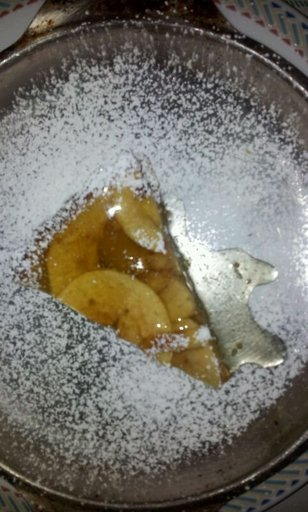

In [35]:

roses = list(data_dir.glob('apple_pie/*'))
PIL.Image.open(str(roses[0]))
     

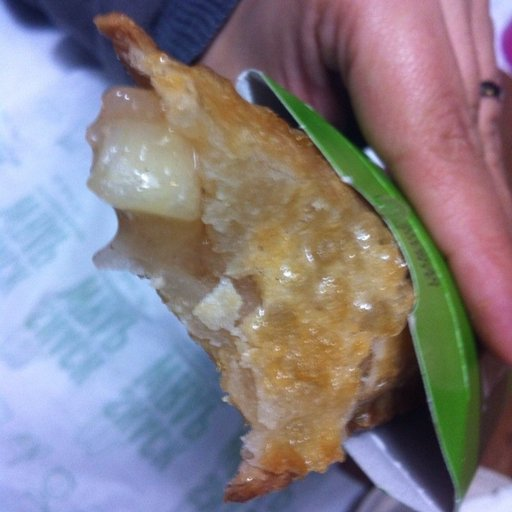

In [36]:
PIL.Image.open(str(roses[1]))

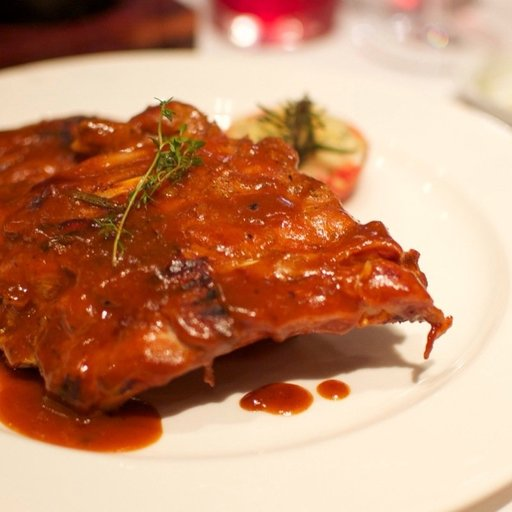

In [38]:

tulips = list(data_dir.glob('baby_back_ribs/*'))
PIL.Image.open(str(tulips[0]))

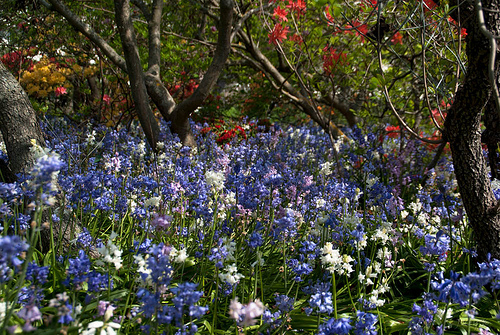

In [8]:
PIL.Image.open(str(tulips[1]))

In [39]:

batch_size = 32
img_height = 180
img_width = 180

In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [41]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [42]:
class_names = train_ds.class_names
print(class_names)

['apple_pie', 'baby_back_ribs']


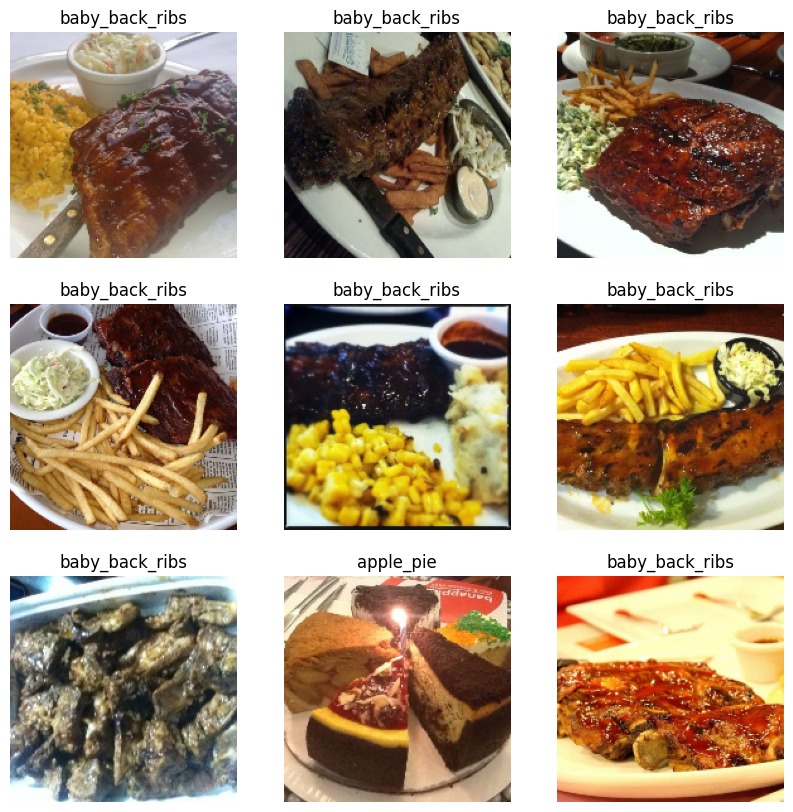

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
normalization_layer = layers.Rescaling(1./255)

In [47]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 1.0


In [48]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [51]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
    

Epoch 1/10
50/50 [==============================] - 20s 374ms/step - loss: 0.7447 - accuracy: 0.5962 - val_loss: 0.5212 - val_accuracy: 0.7800
Epoch 2/10
50/50 [==============================] - 22s 447ms/step - loss: 0.4402 - accuracy: 0.8213 - val_loss: 0.3697 - val_accuracy: 0.8450
Epoch 3/10
50/50 [==============================] - 22s 443ms/step - loss: 0.3455 - accuracy: 0.8600 - val_loss: 0.3800 - val_accuracy: 0.8300
Epoch 4/10
50/50 [==============================] - 23s 459ms/step - loss: 0.2884 - accuracy: 0.8800 - val_loss: 0.3726 - val_accuracy: 0.8350
Epoch 5/10
50/50 [==============================] - 27s 540ms/step - loss: 0.2490 - accuracy: 0.8994 - val_loss: 0.4004 - val_accuracy: 0.8600
Epoch 6/10
50/50 [==============================] - 21s 421ms/step - loss: 0.1882 - accuracy: 0.9256 - val_loss: 0.4435 - val_accuracy: 0.8450
Epoch 7/10
50/50 [==============================] - 26s 516ms/step - loss: 0.1406 - accuracy: 0.9413 - val_loss: 0.4992 - val_accuracy: 0.8125

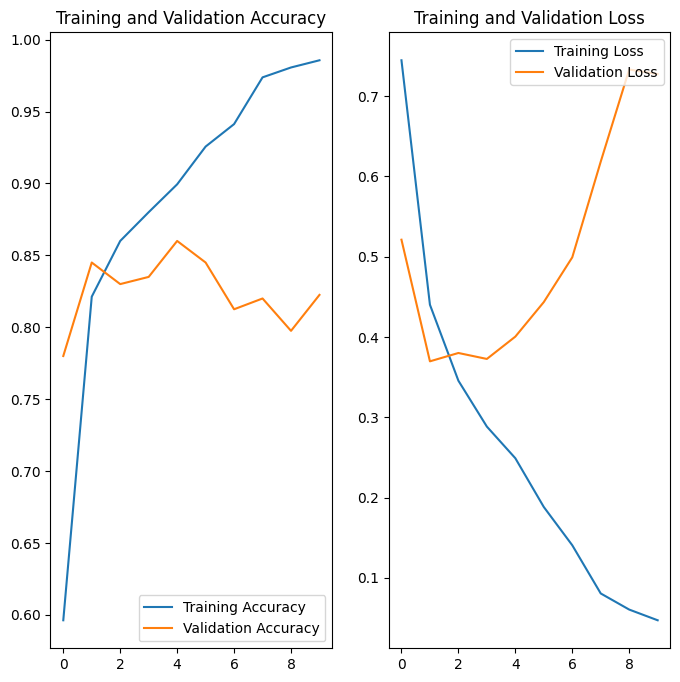

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

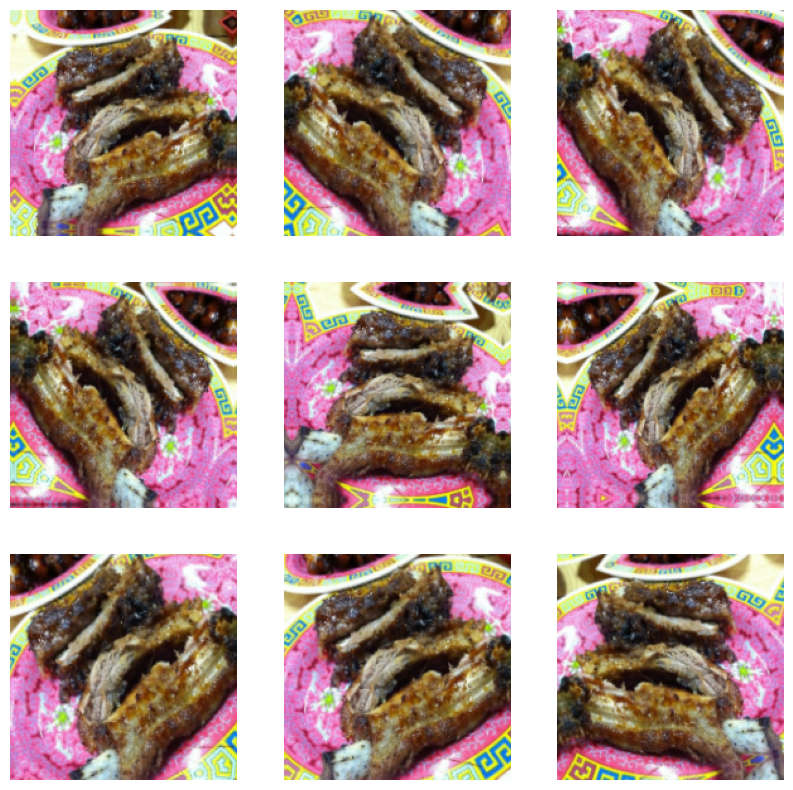

In [54]:

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
     

In [55]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [58]:

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
50/50 [==============================] - 32s 548ms/step - loss: 0.6353 - accuracy: 0.6856 - val_loss: 0.4212 - val_accuracy: 0.8300
Epoch 2/15
50/50 [==============================] - 33s 654ms/step - loss: 0.4984 - accuracy: 0.7925 - val_loss: 0.4934 - val_accuracy: 0.7875
Epoch 3/15
50/50 [==============================] - 29s 573ms/step - loss: 0.3937 - accuracy: 0.8350 - val_loss: 0.3231 - val_accuracy: 0.8750
Epoch 4/15
50/50 [==============================] - 30s 593ms/step - loss: 0.3396 - accuracy: 0.8656 - val_loss: 0.5736 - val_accuracy: 0.8000
Epoch 5/15
50/50 [==============================] - 30s 601ms/step - loss: 0.3505 - accuracy: 0.8544 - val_loss: 0.3233 - val_accuracy: 0.8650
Epoch 6/15
50/50 [==============================] - 28s 551ms/step - loss: 0.3075 - accuracy: 0.8706 - val_loss: 0.4028 - val_accuracy: 0.8400
Epoch 7/15
50/50 [==============================] - 28s 563ms/step - loss: 0.3090 - accuracy: 0.8700 - val_loss: 0.3254 - val_accuracy: 0.8600

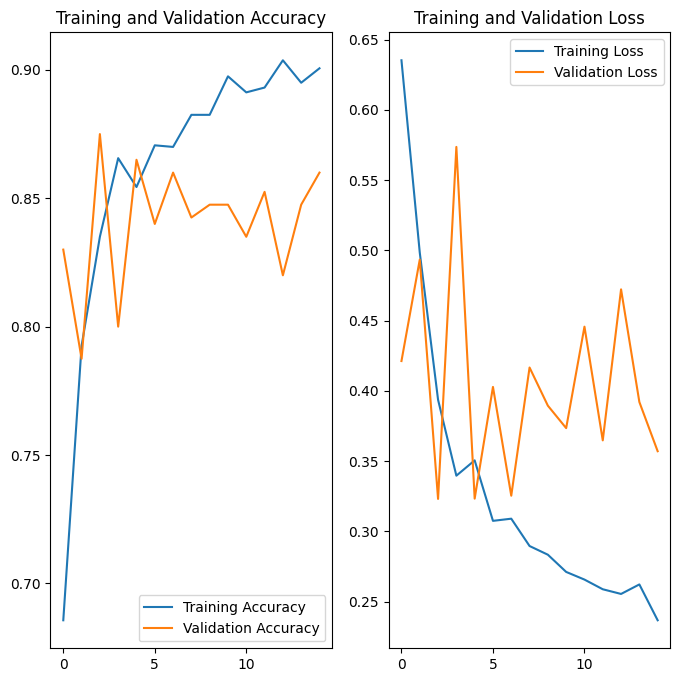

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     

In [60]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 262ms/step
This image most likely belongs to baby_back_ribs with a 99.84 percent confidence.


In [61]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\dumin\AppData\Local\Temp\tmpwz19f3ue\assets


INFO:tensorflow:Assets written to: C:\Users\dumin\AppData\Local\Temp\tmpwz19f3ue\assets


In [64]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [65]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [66]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [67]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

This image most likely belongs to sunflowers with a 99.81 percent confidence.


In [38]:
print(np.max(np.abs(predictions - predictions_lite)))

9.536743e-07
